In [1]:
import optimization
import oracles
import plot_trajectory_2d

In [2]:
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
%matplotlib inline

# Задание 5: проверка работы функций вероятностных аппроксимаций

Зададим оракул с квадратичной функцией с параметрами A = [[1, 2],[2, 5]], b = [1, 1]

In [5]:
oracle = oracles.QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.ones(2))

Сравним значения градиента с его аппроксимацией в точках [1, 1] и [2, 1.5]

In [6]:
oracle.grad(np.array([1., 1.]))

array([2., 6.])

In [7]:
oracles.grad_finite_diff(oracle.func, np.array([1., 1.]))

array([1.99999999, 6.00000005])

In [8]:
oracle.grad(np.array([2., 1.5]))

array([ 4. , 10.5])

In [9]:
oracles.grad_finite_diff(oracle.func, np.array([2., 1.5]))

array([ 3.99999998, 10.50000016])

Значения совпадают с заданной точностью (1e-8), что и требовалось.

Теперь сравним значения гессиана с его аппроксимацией в точках [1, 1] и [2, 1.5]

In [10]:
oracle.hess(np.array([1., 1.]))

array([[1., 2.],
       [2., 5.]])

In [11]:
oracles.hess_finite_diff(oracle.func, np.array([1., 1.]))

array([[1.00000896, 2.00000017],
       [2.00000017, 5.0000093 ]])

In [12]:
oracle.hess(np.array([2., 1.5]))

array([[1., 2.],
       [2., 5.]])

In [13]:
oracles.hess_finite_diff(oracle.func, np.array([3., 1.5]))

array([[1.00001785, 2.00003569],
       [2.00003569, 5.00001818]])

Значения совпадают с заданной точностью (1e-5), что и требовалось.

# Эксперимент 1: Траектория градиентного спуска на квадратичной функции

In [14]:
def wolfe_strategy(oracle, start, c):
    x, msg, history = optimization.gradient_descent(oracle, start, line_search_options={'method': 'Wolfe', 'c2': c}, trace=True)
    print("Число шагов: ", len(history['func']))
    print("Минимум: ", x)
    plot_trajectory_2d.plot_levels(oracle.func)
    plot_trajectory_2d.plot_trajectory(oracle.func, history['x'], label="Метод Вольфе с c2 = " + str(c))

In [15]:
def armijo_strategy(oracle, start, c):
    x, msg, history = optimization.gradient_descent(oracle, start, line_search_options={'method': 'Armijo', 'c1': c}, trace=True)
    print("Число шагов: ", len(history['func']))
    print("Минимум: ", x)
    plot_trajectory_2d.plot_levels(oracle.func)
    plot_trajectory_2d.plot_trajectory(oracle.func, history['x'], label="Метод Армихо с c1 = " + str(c))

In [16]:
def const_strategy(oracle, start, c):
    x, msg, history = optimization.gradient_descent(oracle, start, line_search_options={'method': 'Constant', 'c': c}, trace=True)
    print("Число шагов: ", len(history['func']))
    print("Минимум: ", x)
    plot_trajectory_2d.plot_levels(oracle.func)
    plot_trajectory_2d.plot_trajectory(oracle.func, history['x'], label="Константный метод с константой " + str(c))

Объявим оракул с параметрами A = [[1, 1], [1, 5]] и b = [1, 1]. Начальная точка алгоритма - [1, 1]. Посмотрим последовательно на траектории методов: константный, Вольфе и Армихо:

Число шагов:  104
Минимум:  [0.97947038 0.00484641]


C:\Users\bonda\optimization-methods\lab1\plot_trajectory_2d.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = plt.contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)


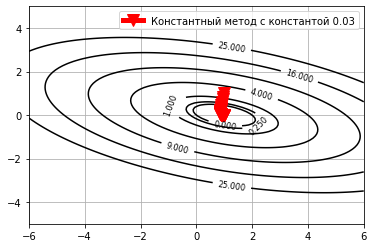

In [17]:
A = np.array([[1., 1.], [1., 5.]])
b = np.array([1., 1.])
x = np.ones(2)
oracle = oracles.QuadraticOracle(A, b)
const_strategy(oracle, x, 0.03)

Число шагов:  7
Минимум:  [0.98897059 0.00367647]


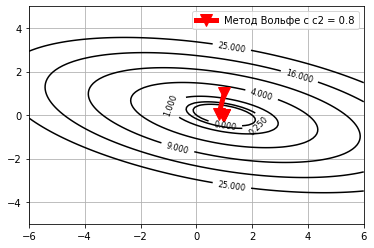

In [18]:
wolfe_strategy(oracle, x, 0.8)

Число шагов:  50
Минимум:  [0.97965873 0.00480193]


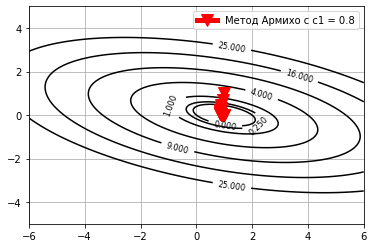

In [19]:
armijo_strategy(oracle, x, 0.8)

Теперь возьмём другую начальную точку - [3, 3] - и повторим наблюдения:

Число шагов:  124
Минимум:  [ 1.07065755 -0.01667998]


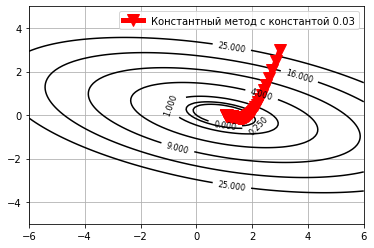

In [20]:
x = np.array([3., 3.])
const_strategy(oracle, x, 0.03)

Число шагов:  9
Минимум:  [ 1.04366304 -0.00396937]


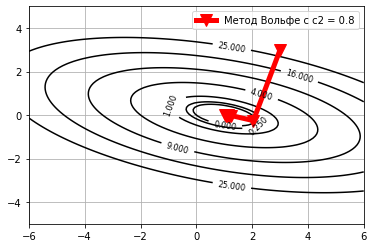

In [21]:
wolfe_strategy(oracle, x, 0.8)

Число шагов:  60
Минимум:  [ 1.06824394 -0.01611021]


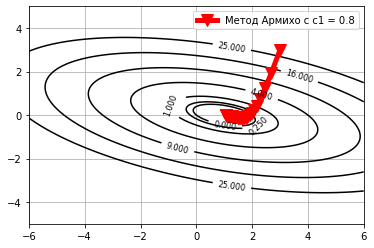

In [22]:
armijo_strategy(oracle, x, 0.8)

После двух этапов наблюдений можно сделать вывод, что работа алгоритма спуска зависит от выбора начальной точки: при выборе более дальней от минимума точки алгоритм сходился дольше, что логично. При этом видно, что метод Вольфе среди всех стратегий выбора шагов сходится быстрее в несколько раз независимо от выбора начальной точки.

Теперь попробуем взять оракул с функций, у которой число обусловленности выше, и повторить эксперимент:

Число шагов:  29
Минимум:  [-0.01841136  0.97267674]


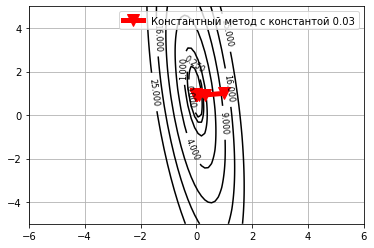

In [23]:
A_new = np.array([[23., 2.5], [2.5, 1.]])
b = np.array([2., 1.])
x = np.ones(2)
oracle = oracles.QuadraticOracle(A_new, b)
const_strategy(oracle, x, 0.03)

Число шагов:  3
Минимум:  [-0.0234007   1.02365066]


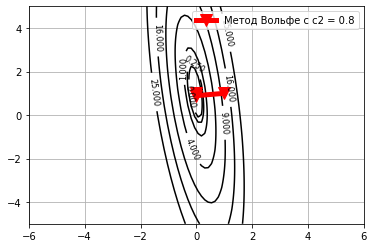

In [24]:
wolfe_strategy(oracle, x, 0.8)

Число шагов:  54
Минимум:  [-0.01827573  0.9714679 ]


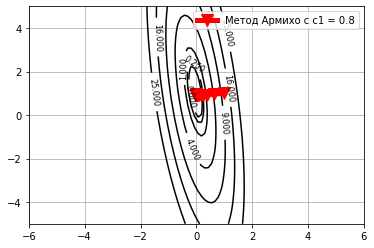

In [25]:
armijo_strategy(oracle, x, 0.8)

Видно, что увеличение числа обусловленности повлияло только на константный метод, он стал работать быстрее.

# Эксперимент 2: Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

In [26]:
np.random.seed(1488)

In [27]:
def create_A_b(n, k):
    diag = np.array([1.0 * np.random.randint(k) for i in range(n)])
    diag[0] = 1
    diag[n-1] = k
    A = np.diagflat(diag)
    b = np.array([1.0 * np.random.randint(k) for i in range(n)])
    
    return A, b

Сгенерируем данные и запустим градиентный спуск с методом Вольфе, который показал себя лучше всего в прошлом эксперименте. В качестве значений размерности n возьмём 5, 10, 15, а в качестве чисел обусловленности 10, 20, 30, 40.

In [28]:
ns = [5, 10, 15]
ks = [10, 20, 30, 40]

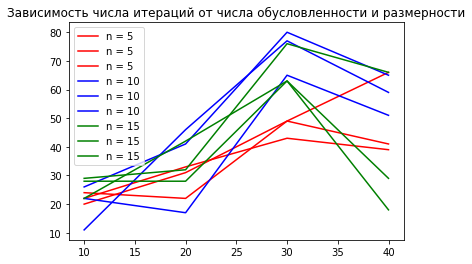

In [29]:
for j, n in enumerate(ns):
    xes = np.ones(n)
    
    for i in range(3):
        n_iterations = []
        for k in ks:
            iters = 10001
            while iters == 10001:
                A, b = create_A_b(n, k)
                oracle = oracles.QuadraticOracle(A, b)
                _, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Wolfe', 'c2': 0.9}, trace=True)
                iters = len(history['func'])
            n_iterations.append(iters)
            
        xs = ks
        ys = n_iterations
        if j == 0:
            color = 'r'
        elif j == 1:
            color = 'b'
        elif j == 2:
            color = 'g'
        plt.plot(xs, ys, label="n = " + str(n), color=color)
        
plt.title("Зависимость числа итераций от числа обусловленности и размерности")
plt.legend()
plt.show()

По графику видно, что, в среднем, с увеличением числа обусловленности увеличивается количество итераций (зависимость, возможно, нелинейная). С увеличением размерности квадратичной задачи количество итераций также увеличивается, при этом повышается количество исходов, когда градиентный спуск не сошелся.

# Эксперимент 4: Стратегия выбора длины шага в градиентном спуске

In [30]:
np.random.seed(1488)

Сгенерируем случайную квадратичную функцию:

In [31]:
n = 3      # размерность пространства
left = 1   # левая и правая границы интервала весов параметров
right = 10

A = np.ndarray((n, n), dtype=float)
for i in range(n):
    for j in range(i, n):
        A[i, j] = A[j, i] = np.random.randint(left, right) * 1.0
b = np.array([1.0 * np.random.randint(n) for i in range(n)])

Сравним стратегии выбора длины шага с начальной точкой [1., 1., 1.], затем с начальной точкой [2., 2., 2.]:

In [32]:
xes = np.array([1., 1., 1.]) # начальная точка
# xes = np.array([2., 2., 2.])

Минимум:  [-1.26895974  1.57941851  1.33840839]


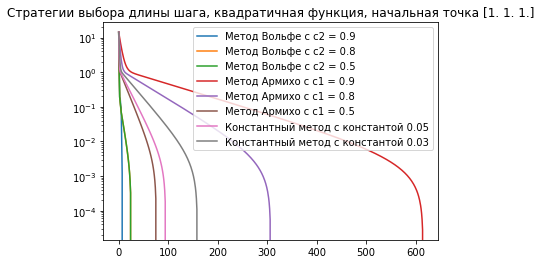

In [33]:
oracle = oracles.QuadraticOracle(A, b)

def plot_strategy(history, label):
    xs = np.array([i for i in range(len(history))])
    ys = np.array(np.abs(np.array(history) - np.min(history)))
    plt.plot(xs, ys, label=label)

x, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Wolfe', 'c2': 0.9}, trace=True)
plot_strategy(history['func'], "Метод Вольфе с c2 = 0.9")
print("Минимум: ", x)

_, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Wolfe', 'c2': 0.8}, trace=True)
plot_strategy(history['func'], "Метод Вольфе с c2 = 0.8")

_, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Wolfe', 'c2': 0.5}, trace=True)
plot_strategy(history['func'], "Метод Вольфе с c2 = 0.5")

_, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Armijo', 'c1': 0.9}, trace=True)

plot_strategy(history['func'], "Метод Армихо с c1 = 0.9")

_, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Armijo', 'c1': 0.8}, trace=True)
plot_strategy(history['func'], "Метод Армихо с c1 = 0.8")

_, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Armijo', 'c1': 0.5}, trace=True)
plot_strategy(history['func'], "Метод Армихо с c1 = 0.5")

_, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Constant', 'c': 0.05}, trace=True)
plot_strategy(history['func'], "Константный метод с константой 0.05")

_, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Constant', 'c': 0.03}, trace=True)
plot_strategy(history['func'], "Константный метод с константой 0.03")

plt.title("Стратегии выбора длины шага, квадратичная функция, начальная точка " + str(xes))
plt.yscale('log')
plt.legend()
plt.show()

При поиске минимума квадратичной функции градиентным спуском метод Вольфе работает быстрее всех. Исходя из сравнения начальных точек, можно сказать, что для точек, близких к минимуму, алгоритм сходится быстрее, что логично.

Теперь проведём эксперимент с регрессией:

Сгенерируем выборку:

In [34]:
m = 800
n = 600
A = np.random.randn(m, n)
b = np.sign(np.random.randn(m))

Сравним стратегии выбора длины шага в задаче регрессии с начальной точкой [1., 1., 1.], затем с начальной точкой [0., 0., 0.]:

In [35]:
xes = np.ones(n) # начальная точка
# xes = np.zeros(n)

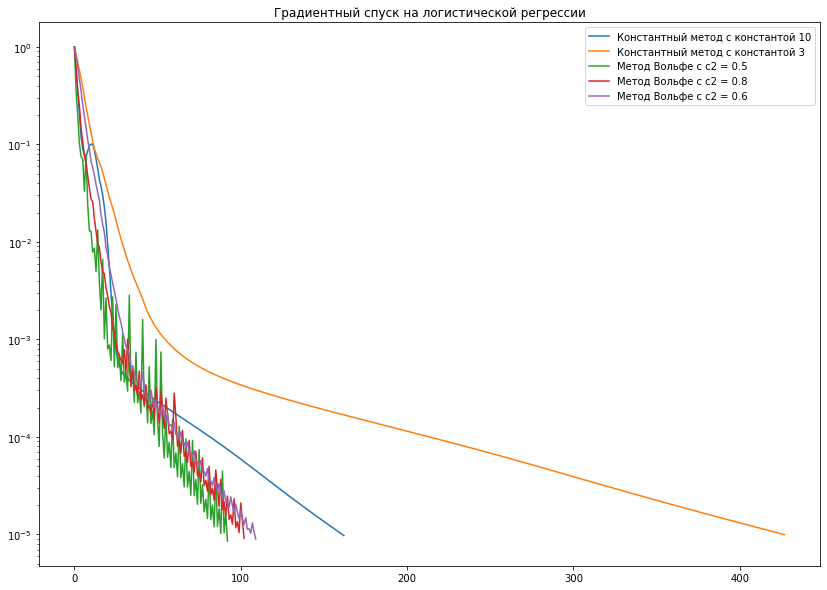

In [36]:
oracle = oracles.create_log_reg_oracle(A, b, 1 / m)

plt.figure(figsize=(14, 10))

def plot_strategy_regression(history, label):
    xs = np.array([i for i in range(len(history))])
    ys = np.array(history) ** 2 / history[0] ** 2
    plt.plot(xs, ys, label=label)

_, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Constant', 'c': 8}, trace=True)
plot_strategy_regression(history['grad_norm'], "Константный метод с константой 10")

_, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Constant', 'c': 3}, trace=True)
plot_strategy_regression(history['grad_norm'], "Константный метод с константой 3")

_, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Wolfe', 'c2': 0.5}, trace=True)
plot_strategy_regression(history['grad_norm'], "Метод Вольфе с c2 = 0.5")

_, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Wolfe', 'c2': 0.8}, trace=True)
plot_strategy_regression(history['grad_norm'], "Метод Вольфе с c2 = 0.8")

_, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Wolfe', 'c1': 0.6}, trace=True)
plot_strategy_regression(history['grad_norm'], "Метод Вольфе с c2 = 0.6")

# Закомментировано для повышения детализации других линий
"""_, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Armijo', 'c1': 0.0001}, trace=True)
plot_strategy_regression(history['grad_norm'], "Метод Армихо с c1 = 0.0001")

_, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Armijo', 'c1': 0.8}, trace=True)
plot_strategy_regression(history['grad_norm'], "Метод Армихо с c1 = 0.8")

_, _, history = optimization.gradient_descent(oracle, xes, line_search_options={'method': 'Armijo', 'c1': 0.2}, trace=True)
plot_strategy_regression(history['grad_norm'], "Метод Армихо с c1 = 0.2")"""

plt.legend()
plt.title("Градиентный спуск на логистической регрессии")
plt.yscale('log')
plt.show()

Метод Вольфе снова оказался быстрее всех, хотя если подобрать хорошую константу, то константный метод может догнать по скорости сходимости. Метод Армихо в десятки раз медленнее сходится, как и до этого.

По итогам эксперимента можно сказать, что лучше использовать метод Вольфе, поскольку он выигрывает за счёт более быстрой сходимости.

# Эксперимент 5: Стратегия выбора длины шага в методе Ньютона

Повторим эксперимент с регрессией, но теперь будем использовать метод Ньютона, а не градиентный спуск:

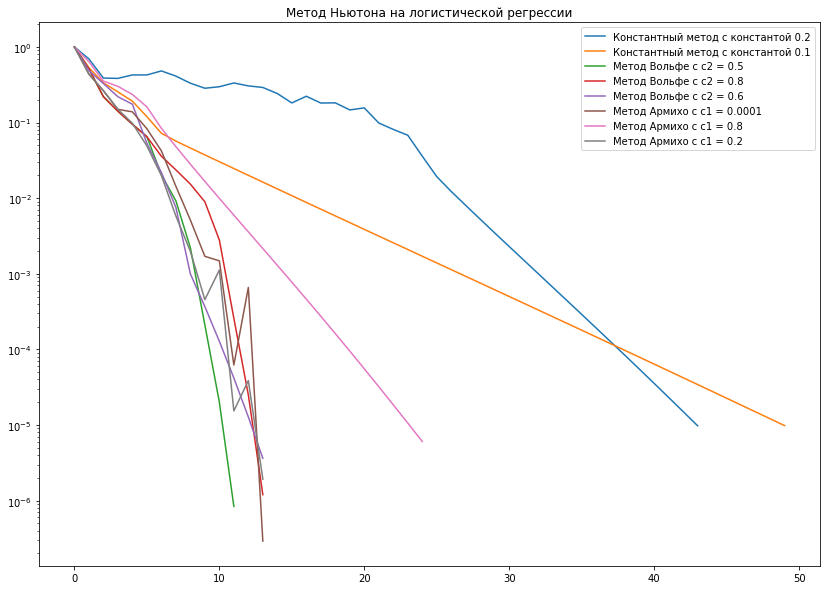

In [37]:
m = 800
n = 600
A = np.random.randn(m, n)
b = np.sign(np.random.randn(m))

xes = np.ones(n) # начальная точка
# xes = np.zeros(n)

oracle = oracles.create_log_reg_oracle(A, b, 1 / m)

plt.figure(figsize=(14, 10))

def plot_strategy_regression(history, label):
    xs = np.array([i for i in range(len(history))])
    ys = np.array(history) ** 2 / history[0] ** 2
    plt.plot(xs, ys, label=label)

_, _, history = optimization.newton(oracle, xes, line_search_options={'method': 'Constant', 'c': 0.2}, trace=True)
plot_strategy_regression(history['grad_norm'], "Константный метод с константой 0.2")

_, _, history = optimization.newton(oracle, xes, line_search_options={'method': 'Constant', 'c': 0.1}, trace=True)
plot_strategy_regression(history['grad_norm'], "Константный метод с константой 0.1")

_, _, history = optimization.newton(oracle, xes, line_search_options={'method': 'Wolfe', 'c2': 0.5}, trace=True)
plot_strategy_regression(history['grad_norm'], "Метод Вольфе с c2 = 0.5")

_, _, history = optimization.newton(oracle, xes, line_search_options={'method': 'Wolfe', 'c2': 0.8}, trace=True)
plot_strategy_regression(history['grad_norm'], "Метод Вольфе с c2 = 0.8")

_, _, history = optimization.newton(oracle, xes, line_search_options={'method': 'Wolfe', 'c1': 0.6}, trace=True)
plot_strategy_regression(history['grad_norm'], "Метод Вольфе с c2 = 0.6")

_, _, history = optimization.newton(oracle, xes, line_search_options={'method': 'Armijo', 'c1': 0.0001}, trace=True)
plot_strategy_regression(history['grad_norm'], "Метод Армихо с c1 = 0.0001")

_, _, history = optimization.newton(oracle, xes, line_search_options={'method': 'Armijo', 'c1': 0.8}, trace=True)
plot_strategy_regression(history['grad_norm'], "Метод Армихо с c1 = 0.8")

_, _, history = optimization.newton(oracle, xes, line_search_options={'method': 'Armijo', 'c1': 0.2}, trace=True)
plot_strategy_regression(history['grad_norm'], "Метод Армихо с c1 = 0.2")

plt.legend()
plt.title("Метод Ньютона на логистической регрессии")
plt.yscale('log')
plt.show()

Здесь метод Вольфе показывает примерно одинаковые результаты с методом Армихо, а константу надо подбирать, чтобы она с ними сравнялась. Ещё было отмечено, что в методе Ньютона сходимость в 10 раз быстрее.

По итогам эксперимента можно сказать, что лучше использовать метод Вольфе, поскольку он выигрывает за счёт более быстрой сходимости.